In [1]:
#import libraries
import pandas as pd
import numpy as np
import string
import spacy
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#import the data set
tweet=pd.read_csv('E:\Data sciences notes\Assignment\Text Mining\Elon_musk.csv',encoding='latin-1',index_col=[0])
tweet

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
#cleaning the data
def clean_text(text):
    
    text=re.sub('@[A-Za-z0-9]+','',str(text))#To remove @
    text=re.sub('#','',str(text)) #To remove #
    text=re.sub('RT[\s]+','',str(text)) #To remove retweets
    text=re.sub('\n\n','',str(text))  #To remove \n
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) #To remove links
    text=text.translate(str.maketrans('', '', string.punctuation))

    return text

tweet['Text']=tweet["Text"].apply(clean_text)
tweet

,Text
1,im an alien
2,aacarmack ray tracing on cyberpunk with hdr is...
3,great interview
4,doge is underestimated
5,congratulations tesla china for amazing execu...
...,...
1995,true it sounds so surreal but the negative pr...
1996,make sure to read ur terms amp conditions bef...
1997,samwise gamgee
1998,altho dumb and dumber is u0001f525u0001f525


In [4]:
elon=tweet.Text
elon_string=" ".join(elon)
elon_string

' i\x92m an alien aacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it   great interview  doge is underestimated  congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox  frodo was the underdoge\nall thought he would fail\nhimself most of all     haha thanks    indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely  just sent some just agree to do clubhouse with     it\x92s getting real bought some dogecoin for lil x so he can be a toddler hodler  he definitely has issues but the sentencing seems a bit high  thanks for fixing  please unlock my account  u0001f923u0001f923 this is true power haha   any crypto wallet that won\x92t give you your private keys should be avoided at all costs  your app sucks  nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission \x85  yes    once we can predict c

In [5]:
#Tokenization
text_tokens=word_tokenize(elon_string)
print(text_tokens)

['i\x92m', 'an', 'alien', 'aacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'great', 'interview', 'doge', 'is', 'underestimated', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'frodo', 'was', 'the', 'underdoge', 'all', 'thought', 'he', 'would', 'fail', 'himself', 'most', 'of', 'all', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'the', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'just', 'sent', 'some', 'just', 'agree', 'to', 'do', 'clubhouse', 'with', 'it\x92s', 'getting', 'real', 'bought', 'some', 'dogecoin', 'for', 'lil', 'x', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'he', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'thanks', 'for', 'fixing', 'p

In [6]:
with open ("E:\Data sciences notes\Assignment\Text Mining\stop.txt","r") as sw:
    stop_words=sw.read()
stop_words=stop_words.split('\n')   
stop_words

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [7]:
tweets_stopword=[word for word in text_tokens if word not in stop_words]
tweets_stopword

['i\x92m',
 'alien',
 'aacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'great',
 'interview',
 'doge',
 'underestimated',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'year',
 'happy',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'thought',
 'fail',
 'haha',
 'tweets',
 'represent',
 'realworld',
 'time',
 'allocation',
 'entertaining',
 'outcome',
 'agree',
 'clubhouse',
 'it\x92s',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'toddler',
 'hodler',
 'issues',
 'sentencing',
 'bit',
 'high',
 'fixing',
 'unlock',
 'account',
 'u0001f923u0001f923',
 'true',
 'power',
 'haha',
 'crypto',
 'wallet',
 'won\x92t',
 'give',
 'private',
 'keys',
 'avoided',
 'costs',
 'app',
 'sucks',
 'nasa',
 'selected',
 'falcon',
 'heavy',
 'launch',
 'elements',
 'lunar',
 'gateway',
 'mission',
 'predict',
 'cash',
 'flow',
 'starlink',
 'ipo',
 'starlink',
 'staggeringly',
 'difficult',
 'technical',
 'amp',
 'economic',
 'endeavor',
 'don',
 'spacex',
 'pass',
 'dee

In [8]:
tf=TfidfVectorizer()
text_tf=tf.fit_transform(tweets_stopword)

In [9]:
feature_names=tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)
df

,005,10,100,1000,10000,100kg,100m,107,10pm,10x,...,zealand,zenit,zeroes,zeros,zimon,zip2,zon,zone,zpalmer,ðogecoin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
wordslist=" ".join(df)

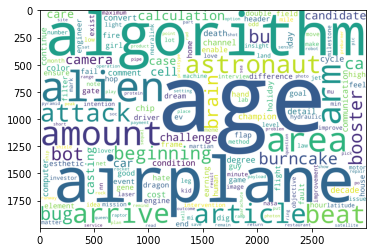

In [11]:
wordcloud=WordCloud(background_color='white',width=3000,height=2000).generate(wordslist)
plt.imshow(wordcloud)

In [12]:
#positive words
with open('E:\Data sciences notes\Assignment\Text Mining\positive-words.txt',"r") as ps:
    positive=ps.read().split("\n")
positive_words=positive[50:]

In [13]:
positive_tweet=" ".join([word for word in df if word in positive_words])

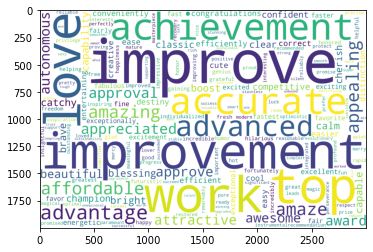

In [14]:
positive_wordcloud=WordCloud(background_color="white",width=3000,height=2000).generate(positive_tweet)
plt.imshow(positive_wordcloud)

In [15]:
#negative words
with open ("E:\\Data sciences notes\\Assignment\\Text Mining\\negative-words.txt","r") as neg:
    negative=neg.read().split("\n")
negative_words=negative[50:]    

In [16]:
negative_tweets=" ".join([word for word in df if word in negative_words])

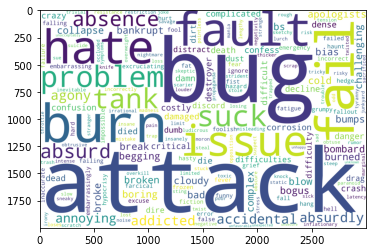

In [17]:
negative_wordcloud=WordCloud(background_color="white",width=3000,height=2000).generate(negative_tweets)
plt.imshow(negative_wordcloud)

In [18]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

tweet[["subjectivity", "polarity"]] = tweet.apply(sentiment_analysis, axis=1)
tweet

,Text,subjectivity,polarity
1,im an alien,0.750000,-0.250000
2,aacarmack ray tracing on cyberpunk with hdr is...,0.000000,0.000000
3,great interview,0.750000,0.800000
4,doge is underestimated,0.000000,0.000000
5,congratulations tesla china for amazing execu...,0.366667,0.275000
...,...,...,...
1995,true it sounds so surreal but the negative pr...,0.508333,0.111111
1996,make sure to read ur terms amp conditions bef...,0.888889,0.500000
1997,samwise gamgee,0.000000,0.000000
1998,altho dumb and dumber is u0001f525u0001f525,0.500000,-0.375000


In [19]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
tweet["analysis"] = tweet["polarity"].apply(analysis)
tweet

,Text,subjectivity,polarity,analysis
1,im an alien,0.750000,-0.250000,Negative
2,aacarmack ray tracing on cyberpunk with hdr is...,0.000000,0.000000,Neutral
3,great interview,0.750000,0.800000,Positive
4,doge is underestimated,0.000000,0.000000,Neutral
5,congratulations tesla china for amazing execu...,0.366667,0.275000,Positive
...,...,...,...,...
1995,true it sounds so surreal but the negative pr...,0.508333,0.111111,Positive
1996,make sure to read ur terms amp conditions bef...,0.888889,0.500000,Positive
1997,samwise gamgee,0.000000,0.000000,Neutral
1998,altho dumb and dumber is u0001f525u0001f525,0.500000,-0.375000,Negative


In [20]:
tweet["analysis"].value_counts()

Neutral     898
Positive    881
Negative    220
Name: analysis, dtype: int64

In [21]:
# Sentiment score of the whole review
tweet['analysis'].describe()

count        1999
unique          3
top       Neutral
freq          898
Name: analysis, dtype: object

In [22]:
#positive /neutral tweets
((898+881)/1999)*100

88.99449724862431

In [23]:
#negative tweets
(220/1999)*100

11.005502751375689

The Elon musk Tweets have 89% positive impact and 11% negative impact on sentiments analysis

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='subjectivity', ylabel='polarity'>

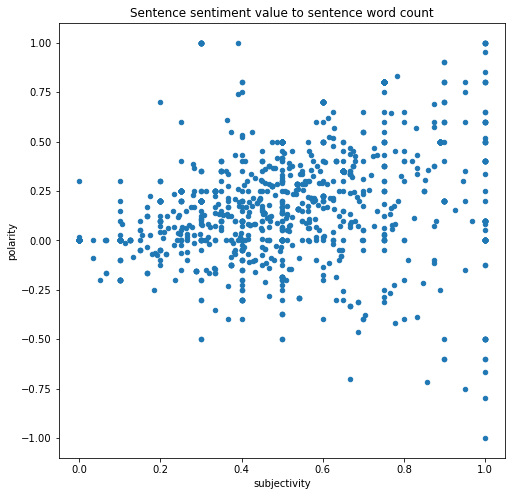

In [24]:
# Correlation analysis
tweet.plot.scatter(x='subjectivity',
    y='polarity',
    figsize=(8,8),
    title='Sentence sentiment value to sentence word count')